In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from stock_data import StockData

In [76]:
stock = StockData('sp_400_midcap.csv', '662166cb8e3d13.57537943')
df = stock.fetch_all_stocks(sector='Materials', period = 'd', start = '2000-01-01', end = '2024-8-30')

In [79]:
def log_ret(s:pd.Series):
    return np.log(s / s.shift(1))

df['log_ret'] = df.groupby('ticker', group_keys=False)['adjusted_close'].apply(log_ret)

In [83]:
df = df.dropna().copy()

In [84]:
df['w'] = df.groupby('date', group_keys=False)['adjusted_close'].transform(lambda x : 1 / len(x))

In [86]:
df.groupby('date').apply(lambda x: x['log_ret']@x['w'])['2020-06-22']

-0.007057655215195054

In [87]:
equal_w_index = df.groupby('date').apply(lambda x: x['log_ret']@x['w'])

<Axes: xlabel='date'>

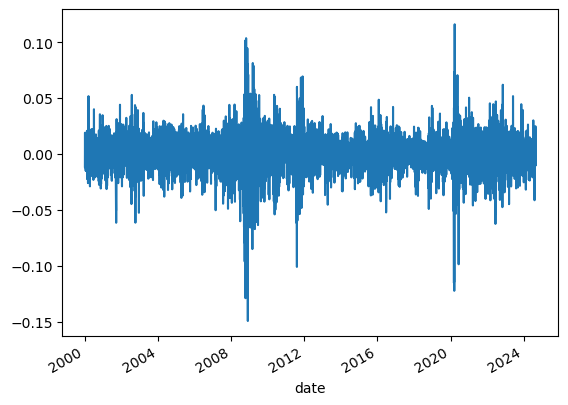

In [88]:
equal_w_index.plot()

In [90]:
def anomaly(s: pd.Series):
    z = (s - s.mean()) / s.std()
    markout = np.where((z > 3) | (z < -3), 1, 0)

    return markout[-1]

label_z_score = equal_w_index.rolling(100).apply(anomaly)

In [91]:
label_df = pd.concat([equal_w_index, label_z_score], axis=1)
label_df.columns = ['ret', 'label']

In [94]:
sum(label_z_score[label_z_score==1])

66.0